In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None 

#### crc egenes

In [8]:
crc_anno = pd.read_csv("../gene_richment/chart_CRC.txt", sep = "\t")
crc_fdr = crc_anno.query("FDR < 0.05")
crc_go = crc_fdr.loc[crc_anno["Category"].isin([ 
                                        "GOTERM_CC_DIRECT",
                                        "GOTERM_MF_DIRECT", 
                                       "GOTERM_BP_DIRECT"
                                        ])]
crc_go["gterm"] = [i.split("~")[-1] for i in crc_go["Term"]]
cc = crc_go.loc[crc_go["Category"] == "GOTERM_CC_DIRECT", ["gterm", "Benjamini", "%"]]
bp = crc_go.loc[crc_go["Category"] == "GOTERM_BP_DIRECT", ["gterm", "Benjamini", "%"]]
mf = crc_go.loc[crc_go["Category"] == "GOTERM_MF_DIRECT", ["gterm", "Benjamini", "%"]]
crc_go["log_p"] = -np.log(crc_go["Benjamini"])
bar_order = np.concatenate([
                cc.sort_values(by = "Benjamini")["gterm"].values,
                mf.sort_values(by = "Benjamini")["gterm"].values,
                bp.sort_values(by = "Benjamini")["gterm"].values,
])

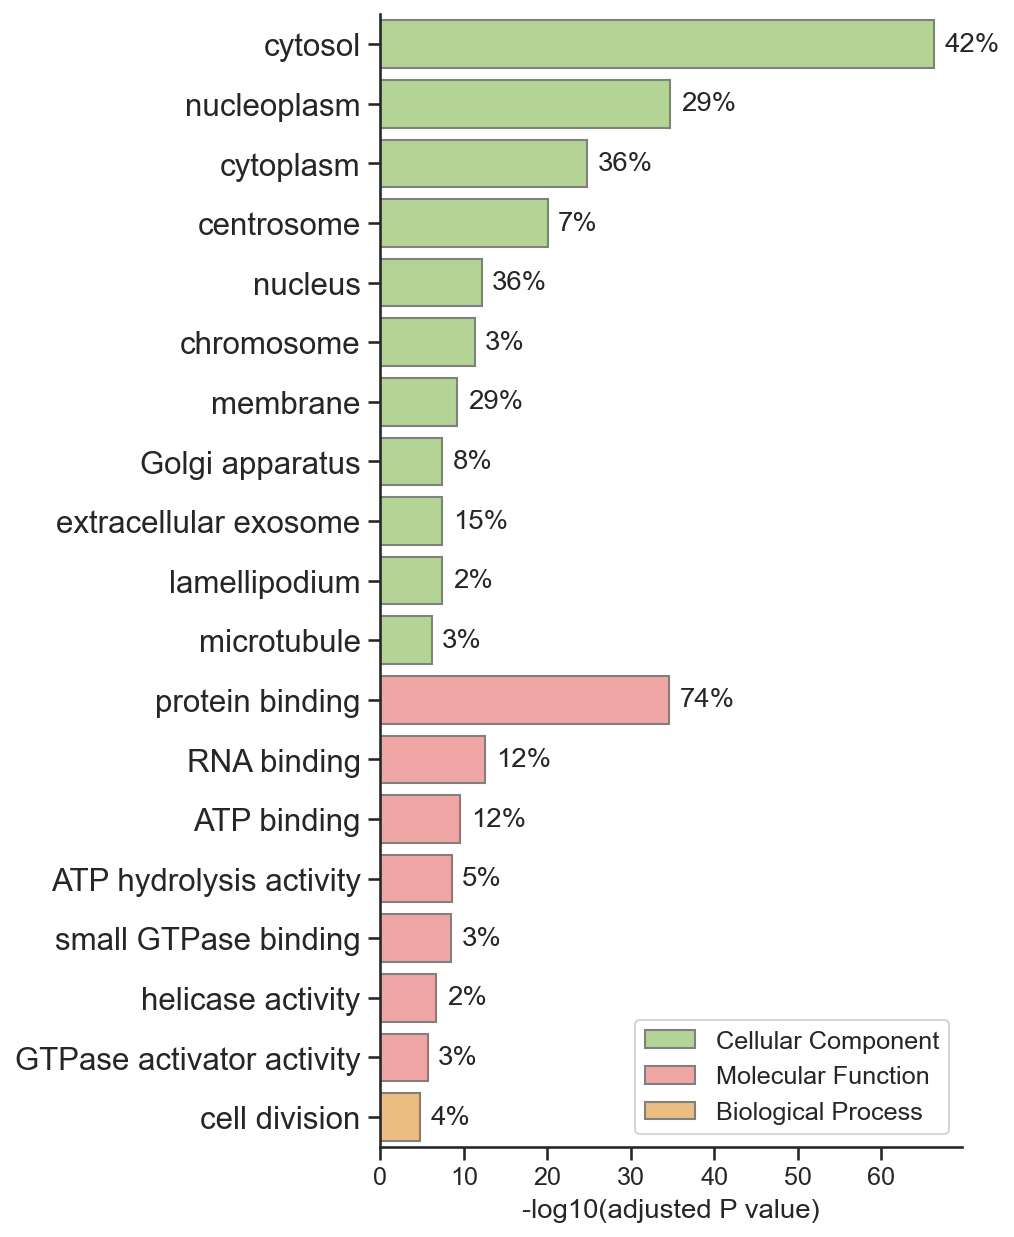

In [193]:
fig, axes = plt.subplots(1, 1, figsize=(5, 10), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.1)
axes = sns.barplot(data = crc_go,
                   y = "gterm", 
                   #x = "%",
                   x = - np.log(crc_go["Benjamini"]), 
                   dodge=False,
                   hue = "Category",
                   order = bar_order,
                   edgecolor = "grey",
                   palette = [sns.color_palette("Paired")[2], 
                              sns.color_palette("Paired")[4],
                              sns.color_palette("Paired")[6]])
axes.set_xlabel("-log10(adjusted P value)")
axes.set_ylabel("")
axes.set_yticklabels(axes.get_yticklabels(),fontsize = 15)

for container in axes.containers:
    axes.bar_label(container, padding = 5, 
               labels = [f'{value:.0f}%' for value in cc.sort_values(by="Benjamini")["%"]] + 
               [f'{value:.0f}%' for value in mf.sort_values(by="Benjamini")["%"]] + 
               [f'{value:.0f}%' for value in bp.sort_values(by="Benjamini")["%"]])

legend_handles, _ = axes.get_legend_handles_labels()
axes.legend(legend_handles, ["Cellular Component","Molecular Function", "Biological Process"
                             ])
sns.move_legend(axes, "lower right")